In [1]:
import pandas as pd
from pylab import rcParams
import seaborn as sb 
import matplotlib.pyplot as plt
import sklearn 
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.datasets import *
from pandas import DataFrame

In [2]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style ('whitegrid')

In [9]:
iris=load_iris()
ir=pd.DataFrame(iris.data)
ir.columns=iris.feature_names
ir['class']=iris.target
data=ir.iloc[:,0:4]
target=ir.iloc[:,4]
ir[:5]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
model=DBSCAN(eps=0.8,min_samples=19).fit(data)
print (model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=None, p=None)


In [5]:
model.fit(data)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=None, p=None)

In [11]:
outliers_df =pd.DataFrame(data)
print (Counter (model.labels_))
print (outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
98                 5.1               2.5                3.0               1.1
105                7.6               3.0                6.6               2.1
117                7.7               3.8                6.7               2.2
118                7.7               2.6                6.9               2.3
122                7.7               2.8                6.7               2.0
131                7.9               3.8                6.4               2.0


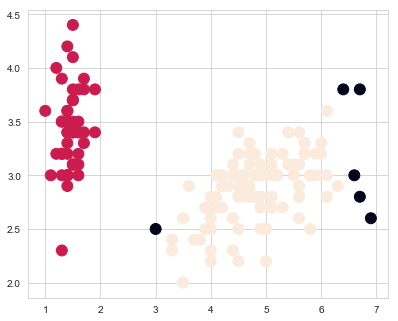

In [12]:
fig =plt.figure()
ax= fig.add_axes([0.1,0.1,1,1])
colors=model.labels_
ax.scatter(data.iloc[:,2],data.iloc[:,1],c=colors ,s=120)